# Crypto Analysis

Analyzing the returns of a basket of cryptocurrencies. 

In [10]:
!pip install yfinance plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import yfinance as yf

You should consider upgrading via the '/home/czar/.pyenv/django/bin/python -m pip install --upgrade pip' command.


### Retrieve Data

In [11]:
symbols = "BTC-USD ETH-USD SHIB-USD XRP-USD"

cryptos = yf.Tickers(symbols).history(interval='1wk', period='1y')['Close']
df = 100 * np.log(1 + cryptos.pct_change()).dropna()

[*********************100%***********************]  4 of 4 completed


### Summary Statistics

In [12]:
df.describe()

,BTC-USD,ETH-USD,SHIB-USD,XRP-USD
count,50.000000,50.000000,50.000000,50.000000
mean,-0.402539,0.732408,5.037580,-1.017776
std,9.542623,13.775106,41.168926,16.281304
min,-28.973520,-53.096849,-81.093025,-60.024092
25%,-7.048671,-7.444705,-13.353138,-7.764980
50%,1.645874,0.172265,0.000000,-1.304572
75%,6.820449,10.606729,12.959430,6.695986
max,14.465081,28.584349,207.944154,50.329418


In [13]:
fig = px.line(df.cumsum(), title='1-Year Historical Returns')
fig.update_layout(yaxis_title='Total return (%)', xaxis_title=None)

### Boxplot

In [14]:
fig = px.box(df, title='Distribution of Weekly Returns')
fig.update_layout(yaxis_title='Weekly return (%)', xaxis_title='coin')
fig.show()

### Correlation Matrix

In [16]:
corrmat = df.corr()
round(corrmat, 2)

,BTC-USD,ETH-USD,SHIB-USD,XRP-USD
BTC-USD,1.00,0.78,0.46,0.74
ETH-USD,0.78,1.00,0.58,0.73
SHIB-USD,0.46,0.58,1.00,0.47
XRP-USD,0.74,0.73,0.47,1.00


### Correlation Heatmap

<AxesSubplot:>

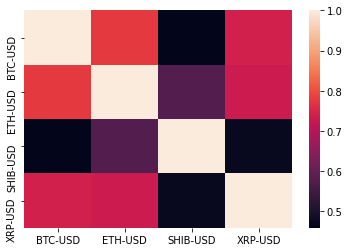

In [17]:
sns.heatmap(corrmat)